# DATA 601 PROJECT
## pop health 3

                                                                                           File created by :Nisha Budhathoki                                                                                    

## Panel data 

Panel data, sometimes referred to as longitudinal data, is data that contains observations about different cross sections across time.

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df = read.csv("20to22_merged_final.csv")
head(df)

,country,countrycode,year,total_deaths,covid_deaths,expected_deaths,excess_deaths,population,land_area,Ratio.of.Excess.death.to.COVID.19.deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,GDP_per_capita,Age_65_over_percentage,urban_pop_percentage,Pop_density,Access_to_quality_healthcare
,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,Australia,AUS,2020,164778,910,168241.20,-3463.205,25655289,7682300,-3.8,163868,3.547027,-13.49899,51868.25,16.2,86,3,72.6
2,Australia,AUS,2021,171718,1359,166854.12,4863.877,25688079,7682300,3.6,170359,5.290392,18.93437,60697.25,16.6,86,3,72.5
3,Australia,AUS,2022,190326,14438,168414.04,21911.965,25978935,7682300,1.5,175888,55.575796,84.34512,65099.85,16.6,86,3,72.5
4,Austria,AUT,2020,91196,7706,83134.64,8061.356,8916845,82409,1.0,83490,86.420701,90.40592,48789.50,19.1,59,108,66.6
5,Austria,AUT,2021,89538,9153,81589.91,7948.094,8951520,82409,0.9,80385,102.250791,88.79044,53517.89,19.4,59,109,66.8
6,Austria,AUT,2022,91582,4689,81758.12,9823.883,9052856,82409,2.1,86893,51.795809,108.51695,52084.68,19.4,59,110,66.8


In [2]:
install.packages("sandwich")


Installing package into 'C:/Users/nicen/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'sandwich' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nicen\AppData\Local\Temp\RtmpainSJu\downloaded_packages


# Pooled regression with interaction terms:

In [3]:
# Create dummy variables for years
df$year2021 <- as.numeric(df$year == 2021)
df$year2022 <- as.numeric(df$year == 2022)

# Model with interactions between COVID deaths and year dummies
model_pooled <- lm(excess_deaths_per_100k ~ covid_deaths_per_100k * year2021 + covid_deaths_per_100k * year2022 + GDP_per_capita + Age_65_over_percentage + urban_pop_percentage + Pop_density+Access_to_quality_healthcare, data = df)

summary(model_pooled)


Call:
lm(formula = excess_deaths_per_100k ~ covid_deaths_per_100k * 
    year2021 + covid_deaths_per_100k * year2022 + GDP_per_capita + 
    Age_65_over_percentage + urban_pop_percentage + Pop_density + 
    Access_to_quality_healthcare, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-100.229  -27.086   -3.872   20.364  149.258 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     2.311e+02  7.071e+01   3.268  0.00147 ** 
covid_deaths_per_100k           1.225e+00  1.579e-01   7.755  6.6e-12 ***
year2021                        1.003e+01  1.721e+01   0.583  0.56145    
year2022                        5.228e+01  2.200e+01   2.376  0.01934 *  
GDP_per_capita                 -3.311e-04  1.693e-04  -1.956  0.05312 .  
Age_65_over_percentage         -2.003e+00  1.272e+00  -1.575  0.11825    
urban_pop_percentage           -3.677e-01  4.030e-01  -0.912  0.36368    
Pop_density                     1.937e-

Residuals: The differences between the observed values and the values predicted by the model. The spread from -100.229 to 149.258 suggests some variability in the model's predictions.

Coefficients:

Estimate: These are the predicted changes in the dependent variable (excess deaths per 100k) for a one-unit increase in the predictor, holding all other predictors constant. For example, each unit increase in COVID-19 deaths per 100k is associated with a 1.225 increase in excess deaths per 100k.

Std. Error: This indicates the standard error of the estimated coefficient, reflecting the variability of the estimate.
t value: A test statistic showing how many standard errors the coefficient is away from 0. Larger absolute values suggest stronger evidence against the null hypothesis (which states that the coefficient is zero).

Pr(>|t|): P-value, showing the probability of observing the data if the null hypothesis is true. Lower values indicate stronger evidence against the null hypothesis.

Residual Standard Error: This is the average amount that the response will deviate from the true regression line. It's 41.86 in this model.

Multiple R-squared and Adjusted R-squared: These provide measures of how well the model explains the variability in the response variable. The closer these values are to 1, the better the model fits the data. In this case, the model explains about 76.42% of the variability (Multiple R-squared).

F-statistic and its p-value: This tests the overall significance of the model. A very low p-value (here, < 2.2e-16) suggests that the model is statistically significant, meaning at least one predictor variable has a non-zero coefficient.

Overall, the model seems to have some significant predictors (like COVID-19 deaths per 100k, year2022, Access to quality healthcare) but also includes variables that are not significant predictors in this context (like Pop density, urban_pop_percentage). The model has a good fit as indicated by the R-squared values.

#  Mixed effects regression:

In [4]:
library(lme4)

# Model with random intercepts for country and year
model_me <- lmer(excess_deaths_per_100k ~ covid_deaths_per_100k + GDP_per_capita + Age_65_over_percentage + urban_pop_percentage + Pop_density+Access_to_quality_healthcare+ (1 | countrycode) + (1 | year), data = df)

summary(model_me)

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Warning message:
"Some predictor variables are on very different scales: consider rescaling"


Linear mixed model fit by REML ['lmerMod']
Formula: excess_deaths_per_100k ~ covid_deaths_per_100k + GDP_per_capita +  
    Age_65_over_percentage + urban_pop_percentage + Pop_density +  
    Access_to_quality_healthcare + (1 | countrycode) + (1 | year)
   Data: df

REML criterion at convergence: 1155.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7299 -0.5130 -0.0188  0.5346  2.6084 

Random effects:
 Groups      Name        Variance Std.Dev.
 countrycode (Intercept) 1070.2   32.71   
 year        (Intercept)  160.6   12.67   
 Residual                 797.9   28.25   
Number of obs: 114, groups:  countrycode, 38; year, 3

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                   2.034e+02  9.761e+01   2.083
covid_deaths_per_100k         1.228e+00  6.975e-02  17.599
GDP_per_capita               -2.419e-04  2.444e-04  -0.990
Age_65_over_percentage       -2.332e+00  1.877e+00  -1.242
urban_pop_percentage         -3.478e-01

In [6]:

library(foreign)

# Create a conditional plot using coplot
coplot(excess_deaths_per_100k ~ year | country, type = "l", data = df)


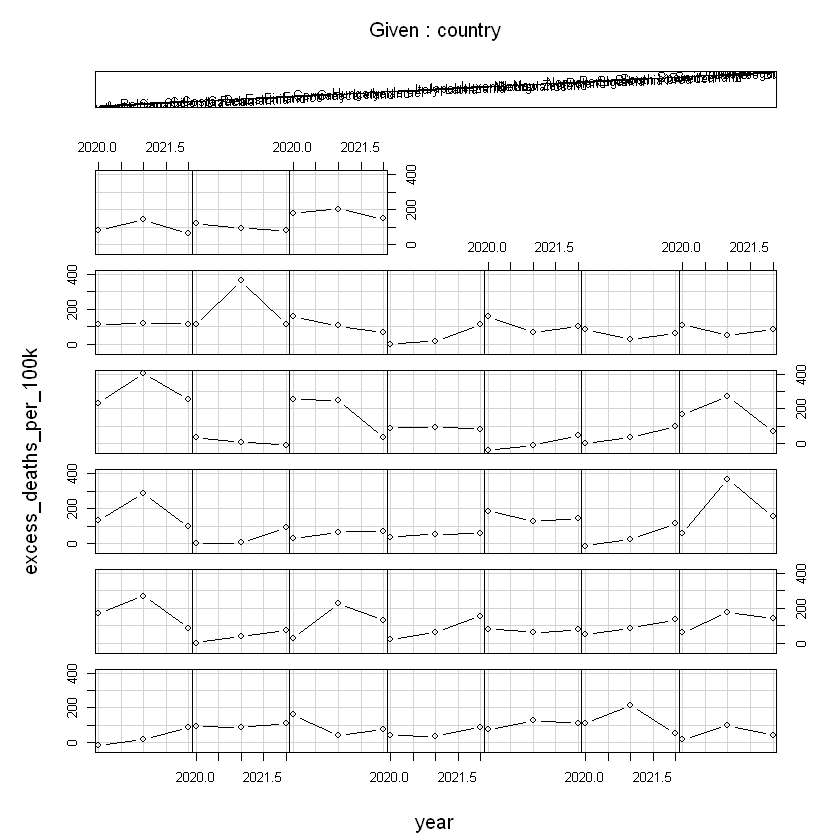

In [5]:
coplot(excess_deaths_per_100k ~ year|country, type="b", data=df) 

In [9]:
library(car) 
scatterplot(excess_deaths_per_100k~year|country, boxplots=FALSE, smooth=TRUE, reg.line=FALSE, data=df)

In [8]:
install.packages("gplots")


#  Heterogeneity across countries 

Warning message:
"package 'gplots' was built under R version 4.3.2"

Attaching package: 'gplots'


The following object is masked from 'package:stats':

    lowess


Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(x, ui, x, pmin(y + gap, ui), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(x, ui, x, pmin(y + gap, ui), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"


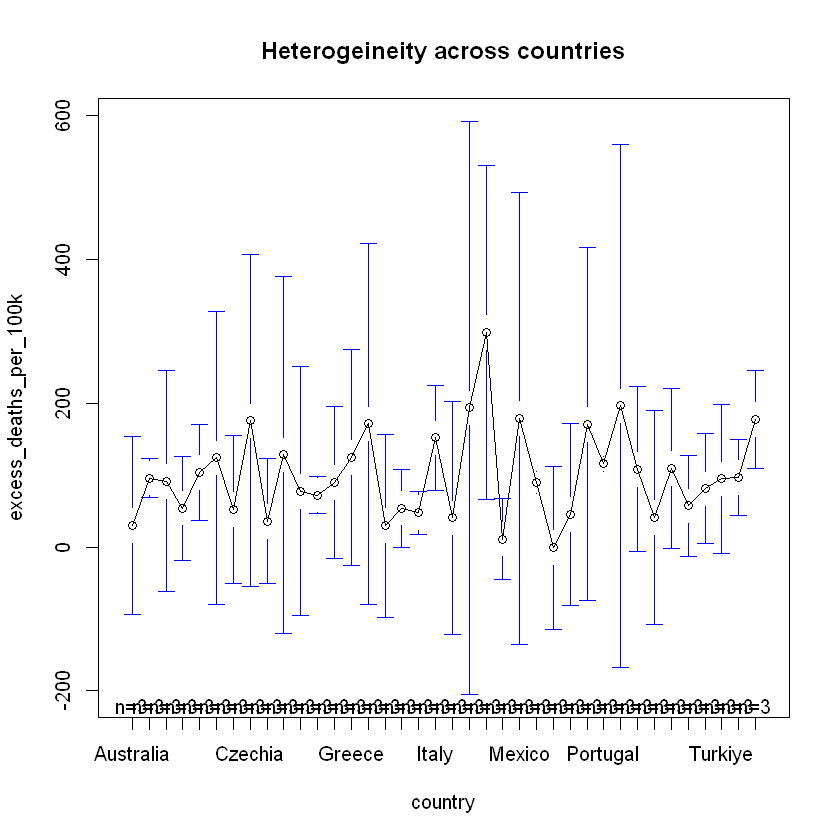

In [5]:
library(gplots) 
plotmeans(excess_deaths_per_100k ~ country, main="Heterogeineity across countries", data=df)

# Heterogeneity across years 

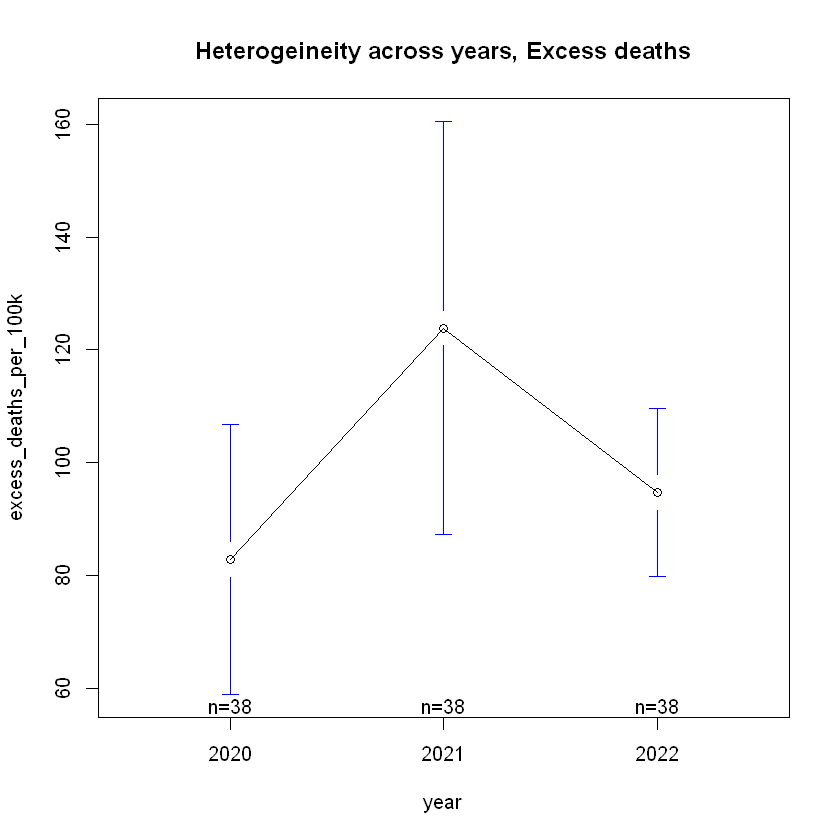

In [7]:
plotmeans(excess_deaths_per_100k ~ year, main="Heterogeineity across years, Excess deaths", data=df)

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some




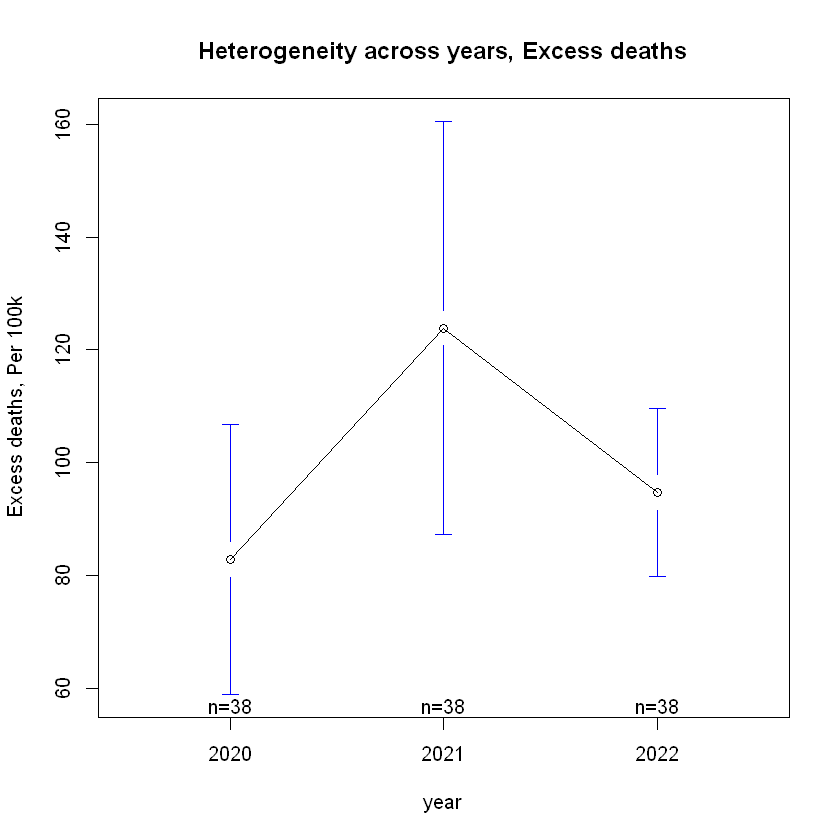

In [6]:
library(car)
library(gplots) 
plotmeans(excess_deaths_per_100k ~ year, main="Heterogeneity across years, Excess deaths", ylab="Excess deaths, Per 100k", data=df)


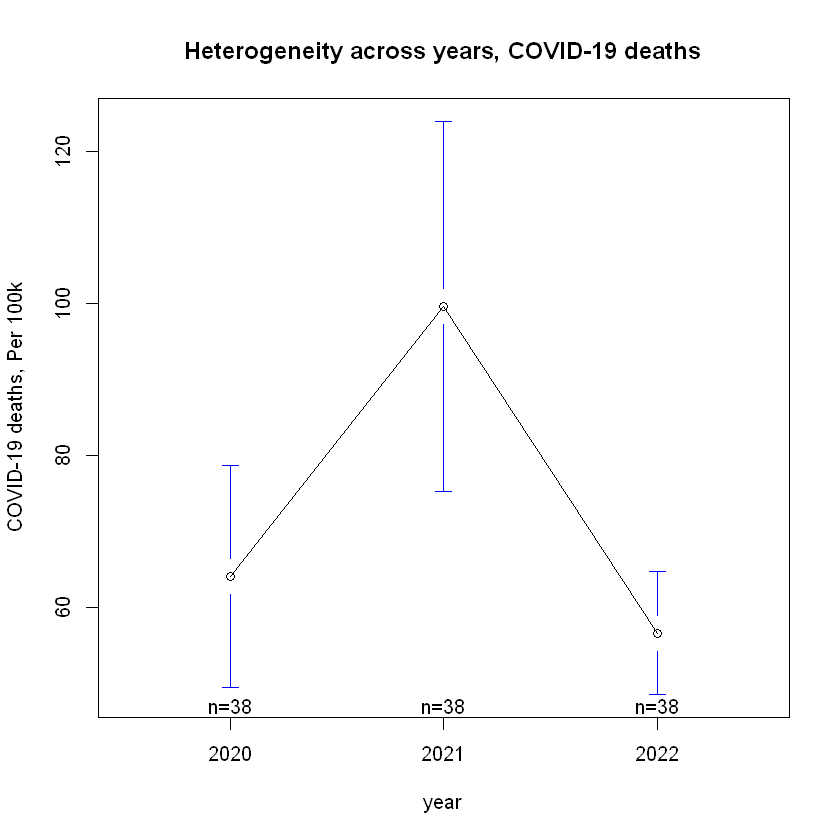

In [8]:

plotmeans(covid_deaths_per_100k ~ year, main="Heterogeneity across years, COVID-19 deaths",ylab="COVID-19 deaths, Per 100k", data=df)

# OLS regression

In [9]:
 ols<-lm(excess_deaths_per_100k ~ covid_deaths_per_100k, data=df) 
 summary(ols)


Call:
lm(formula = excess_deaths_per_100k ~ covid_deaths_per_100k, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-100.044  -27.481   -5.609   23.913  156.915 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            8.48275    7.19859   1.178    0.241    
covid_deaths_per_100k  1.25267    0.07873  15.912   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 45.78 on 112 degrees of freedom
Multiple R-squared:  0.6933,	Adjusted R-squared:  0.6906 
F-statistic: 253.2 on 1 and 112 DF,  p-value: < 2.2e-16


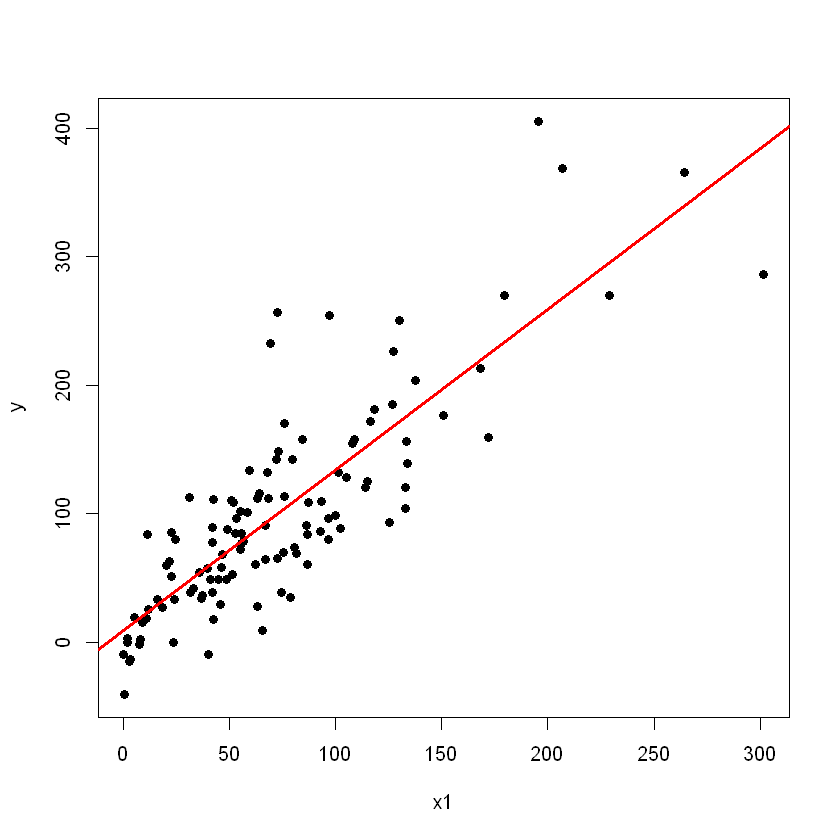

In [10]:
plot(df$covid_deaths_per_100k, df$excess_deaths_per_100k, pch=19, xlab="x1", ylab="y") 
abline(lm(df$excess_deaths_per_100k~df$covid_deaths_per_100k),lwd=3, col="red")

# Fixed effects using Least squares dummy variable model

In [11]:
 fixed.dum <-lm(excess_deaths_per_100k ~ covid_deaths_per_100k + factor(country) -1, data=df) 
summary(fixed.dum)


Call:
lm(formula = excess_deaths_per_100k ~ covid_deaths_per_100k + 
    factor(country) - 1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-75.618 -16.721  -0.162  14.774  60.136 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
covid_deaths_per_100k           1.1787     0.0707  16.671  < 2e-16 ***
factor(country)Australia        4.6194    17.7029   0.261  0.79485    
factor(country)Austria          1.4267    18.5258   0.077  0.93882    
factor(country)Belgium        -21.8718    18.9070  -1.157  0.25102    
factor(country)Canada           3.6056    17.8982   0.201  0.84089    
factor(country)Chile            1.6328    18.6650   0.087  0.93052    
factor(country)Colombia        14.6908    18.8195   0.781  0.43748    
factor(country)Costa Rica     -16.6561    18.1183  -0.919  0.36089    
factor(country)Czechia         19.1555    19.9773   0.959  0.34071    
factor(country)Denmark        -15.6174    17.9059  -0.872  0.38589    
fact


Here's an analysis of the regression results you provided:

Model Summary:

R-squared (0.9635): The model explains 96.35% of the variability in excess deaths per 100k.
Adjusted R-squared (0.9445): Accounts for the number of predictors, indicating a strong fit even considering model complexity.
F-statistic (50.73, p < 2.2e-16): Highly significant, suggesting the model overall has predictive power.
Key Findings:

COVID deaths per 100k: Strongly associated with excess deaths per 100k (coefficient = 1.18, p < 2e-16). A unit increase in COVID deaths per 100k is associated with an estimated 1.18 increase in excess deaths per 100k.
Country Effects:
Significant differences in excess deaths across countries, even after controlling for COVID deaths.
Countries with significantly higher excess deaths (positive coefficients): Estonia, Lithuania, Latvia, Mexico, Netherlands, Poland, Slovakia, Turkey.
Countries with significantly lower excess deaths (negative coefficients): Luxembourg.
Other countries don't show significant differences from the reference country (omitted due to -1 in the formula).
Additional Considerations:

Residual standard error (30.55): Indicates some variability in excess deaths not explained by the model, suggesting room for improvement.
Potential confounding variables: Consider other factors that might influence excess deaths (e.g., healthcare quality, socioeconomic factors, age distribution) to refine the model.
Model assumptions: Check for linearity, normality, homoscedasticity, and independence of residuals to ensure valid conclusions.

Warning message in scatterplot.default(X[, 2], X[, 1], groups = X[, 3], xlab = xlab, :
"number of groups exceeds number of available colors
  colors are recycled"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '26'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '26'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '26'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '27'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '27'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '27'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '28'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '28'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch val

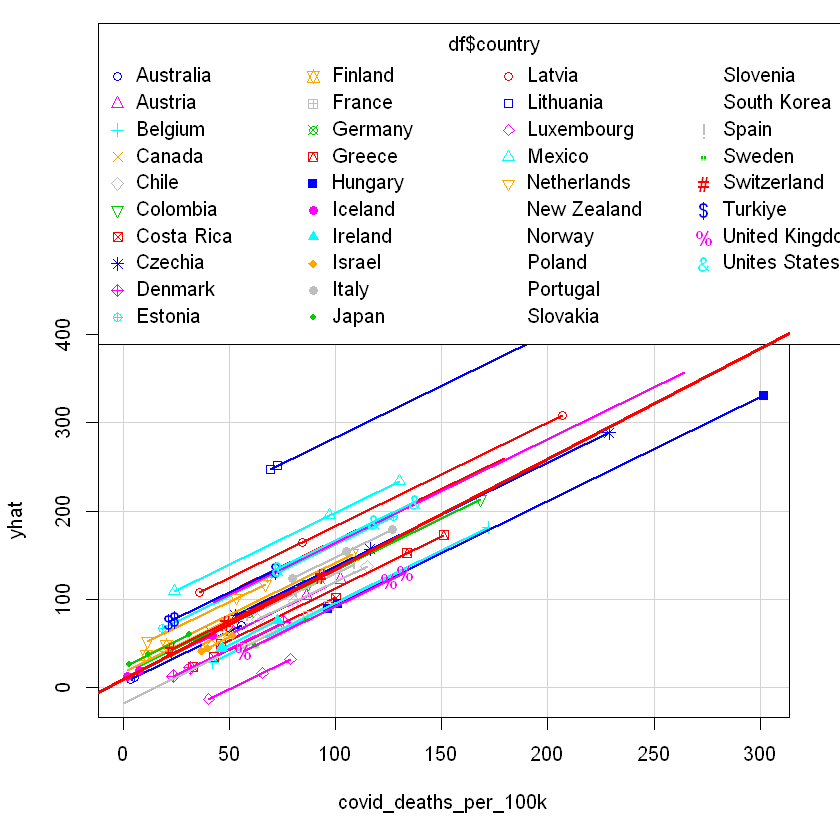

In [12]:
 yhat <-fixed.dum$fitted 


scatterplot(yhat~df$covid_deaths_per_100k|df$country, boxplots=FALSE, xlab="covid_deaths_per_100k", ylab="yhat",smooth=FALSE) 
abline(lm(df$excess_deaths_per_100k~df$covid_deaths_per_100k),lwd=3, col="red")

In [13]:
 fixed.dum.year <-lm(excess_deaths_per_100k ~ covid_deaths_per_100k + factor(year) -1, data=df) 
summary(fixed.dum.year)


Call:
lm(formula = excess_deaths_per_100k ~ covid_deaths_per_100k + 
    factor(year) - 1, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-102.189  -23.465   -4.292   19.740  156.039 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
covid_deaths_per_100k  1.30972    0.08195  15.982   <2e-16 ***
factor(year)2020      -1.07641    8.95944  -0.120   0.9046    
factor(year)2021      -6.58995   10.92368  -0.603   0.5476    
factor(year)2022      20.54373    8.61548   2.385   0.0188 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 44.74 on 110 degrees of freedom
Multiple R-squared:  0.8851,	Adjusted R-squared:  0.8809 
F-statistic: 211.8 on 4 and 110 DF,  p-value: < 2.2e-16


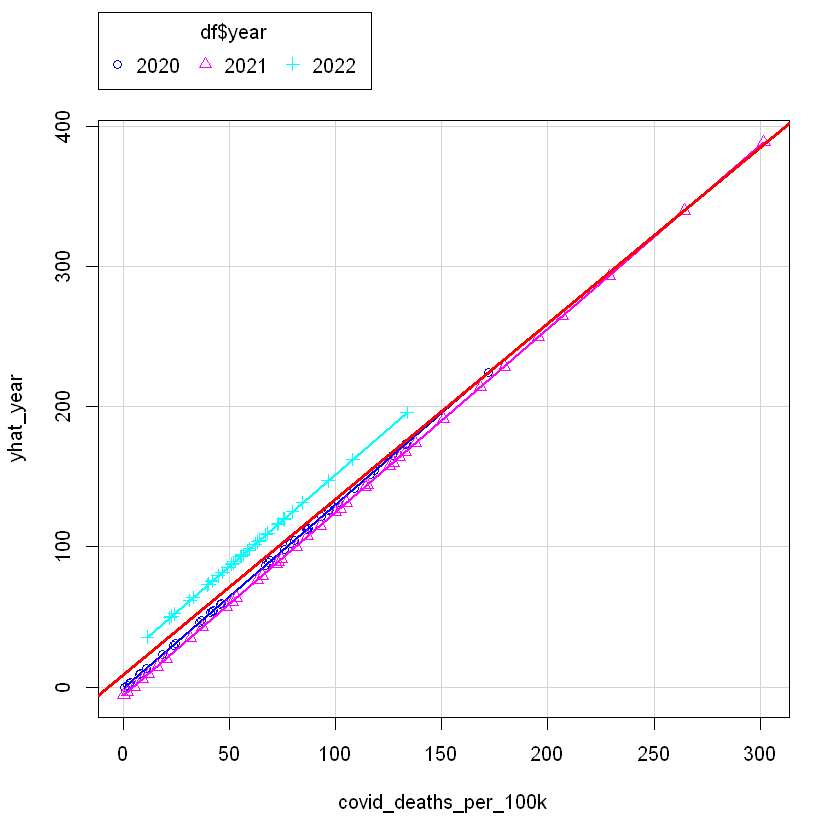

In [14]:
yhat_year <-fixed.dum.year$fitted 


scatterplot(yhat_year~df$covid_deaths_per_100k|df$year, boxplots=FALSE, xlab="covid_deaths_per_100k", ylab="yhat_year",smooth=FALSE) 
abline(lm(df$excess_deaths_per_100k~df$covid_deaths_per_100k),lwd=3, col="red")

In [37]:
install.packages("plm")

Installing package into 'C:/Users/nicen/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

also installing the dependencies 'miscTools', 'rbibutils', 'bdsmatrix', 'collapse', 'maxLik', 'Rdpack'




package 'miscTools' successfully unpacked and MD5 sums checked
package 'rbibutils' successfully unpacked and MD5 sums checked
package 'bdsmatrix' successfully unpacked and MD5 sums checked
package 'collapse' successfully unpacked and MD5 sums checked
package 'maxLik' successfully unpacked and MD5 sums checked
package 'Rdpack' successfully unpacked and MD5 sums checked
package 'plm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nicen\AppData\Local\Temp\Rtmp2J9XWL\downloaded_packages


In [35]:
#  library(apsrtable) 
#  apsrtable(ols,fixed.dum.year, model.names= c("OLS", "OLS_DUM"))   # Displays a table in Latex form

In [15]:
 library(plm) 
fixed <-plm(excess_deaths_per_100k ~ covid_deaths_per_100k, data=df, index=c("country", "year"), model="within") 
summary(fixed) 

Warning message:
"package 'plm' was built under R version 4.3.2"

Attaching package: 'plm'


The following objects are masked from 'package:dplyr':

    between, lag, lead




Oneway (individual) effect Within Model

Call:
plm(formula = excess_deaths_per_100k ~ covid_deaths_per_100k, 
    data = df, model = "within", index = c("country", "year"))

Balanced Panel: n = 38, T = 3, N = 114

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-75.6182 -16.7213  -0.1622  14.7743  60.1355 

Coefficients:
                      Estimate Std. Error t-value  Pr(>|t|)    
covid_deaths_per_100k 1.178677   0.070701  16.671 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    329380
Residual Sum of Squares: 69995
R-Squared:      0.78749
Adj. R-Squared: 0.67982
F-statistic: 277.93 on 1 and 75 DF, p-value: < 2.22e-16

# Display the fixed effects (constants for each country)

In [19]:
fixef(fixed)

Australia        Austria        Belgium         Canada          Chile 
        4.6194         1.4267       -21.8718         3.6056         1.6328 
      Colombia     Costa Rica        Czechia        Denmark        Estonia 
       14.6908       -16.6561        19.1555       -15.6174        44.0780 
       Finland         France        Germany         Greece        Hungary 
       22.7569       -21.9397        13.6122        -5.7285       -24.9395 
       Iceland        Ireland         Israel          Italy          Japan 
        9.2707       -10.7464        -2.8158        29.4240        22.5367 
        Latvia      Lithuania     Luxembourg         Mexico    Netherlands 
       64.9250       165.5499       -61.4818        80.1616        38.2149 
   New Zealand         Norway         Poland       Portugal       Slovakia 
      -18.7077        14.5015        48.6726        18.7900        46.1099 
      Slovenia    South Korea          Spain         Sweden    Switzerland 
      -22.7257        17.0853        11.1915       -25.9043        16.1286 
       Turkiye United Kingdom  Unites States 
       48.3061       -26.5346        48.0683

#  Testing for fixed effects, null: OLS better than fixed

In [20]:
 pFtest(fixed, ols)


	F test for individual effects

data:  excess_deaths_per_100k ~ covid_deaths_per_100k
F = 4.7713, df1 = 37, df2 = 75, p-value = 4.935e-09
alternative hypothesis: significant effects


# RANDOM-EFFECTS MODEL (Random Intercept, Partial Pooling Model)

In [21]:
random <-plm(excess_deaths_per_100k ~ covid_deaths_per_100k, data=df, index=c("country", "year"), model="random") 
summary(random)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = excess_deaths_per_100k ~ covid_deaths_per_100k, 
    data = df, model = "random", index = c("country", "year"))

Balanced Panel: n = 38, T = 3, N = 114

Effects:
                  var std.dev share
idiosyncratic  933.27   30.55 0.439
individual    1193.32   34.54 0.561
theta: 0.5453

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-66.1775 -22.8392  -5.2531  19.3836  88.6917 

Coefficients:
                       Estimate Std. Error z-value Pr(>|z|)    
(Intercept)           12.173961   7.909483  1.5392   0.1238    
covid_deaths_per_100k  1.202409   0.065362 18.3960   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    419550
Residual Sum of Squares: 104320
R-Squared:      0.75134
Adj. R-Squared: 0.74912
Chisq: 338.414 on 1 DF, p-value: < 2.22e-16

# FIXED OR RANDOM?

To decide between fixed or random effects you can run a Hausmantest where the null hypothesis is that the preferred model is random effects vs. the alternative the fixed effects (see Green, 2008, chapter 9).  It basically tests whether the unique errors (ui) are correlated with the regressors, the null hypothesis is they are not. Run a fixed effects model and save the estimates, then run a random model and save the estimates, then perform the test. If the p-value is significant (for example <0.05) then use fixed effects, if not use random effects.

In [22]:
 phtest(fixed, random)


	Hausman Test

data:  excess_deaths_per_100k ~ covid_deaths_per_100k
chisq = 0.7753, df = 1, p-value = 0.3786
alternative hypothesis: one model is inconsistent


If p-value is < 0.05 then use fixed effects

# Testing for time-fixed effects

In [23]:
 library(plm) 
fixed <-plm(excess_deaths_per_100k ~ covid_deaths_per_100k, data=df, index=c("country", "year"), model="within") 

fixed.time<-plm(excess_deaths_per_100k ~ covid_deaths_per_100k + factor(year), data=df, index=c("country", "year"), model="within") 

summary(fixed.time) 

# Oneway(individual) effect Within Model

Oneway (individual) effect Within Model

Call:
plm(formula = excess_deaths_per_100k ~ covid_deaths_per_100k + 
    factor(year), data = df, model = "within", index = c("country", 
    "year"))

Balanced Panel: n = 38, T = 3, N = 114

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-85.5589 -14.4170  -1.7242  12.1057  63.4166 

Coefficients:
                       Estimate Std. Error t-value  Pr(>|t|)    
covid_deaths_per_100k  1.274446   0.073224 17.4048 < 2.2e-16 ***
factor(year)2021      -4.260603   6.938368 -0.6141  0.541082    
factor(year)2022      21.357162   6.455467  3.3084  0.001459 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    329380
Residual Sum of Squares: 57387
R-Squared:      0.82577
Adj. R-Squared: 0.7303
F-statistic: 115.33 on 3 and 73 DF, p-value: < 2.22e-16

# Testing time-fixed effects. The null is that no time-fixed effects needed

In [24]:
pFtest(fixed.time, fixed)


	F test for individual effects

data:  excess_deaths_per_100k ~ covid_deaths_per_100k + factor(year)
F = 8.019, df1 = 2, df2 = 73, p-value = 0.0007108
alternative hypothesis: significant effects


In [25]:
 plmtest(fixed, c("time"), type=("bp"))


	Lagrange Multiplier Test - time effects (Breusch-Pagan)

data:  excess_deaths_per_100k ~ covid_deaths_per_100k
chisq = 2.2001, df = 1, p-value = 0.138
alternative hypothesis: significant effects


for both above,

If p-value is < 0.05 then use time-fixed effects.

# How to deal with Panel Data
 trying this code from another paper 

Panel data analysis is one of the very popular econometrics method. It helps us study the cross section and time series data at the same time.

In [46]:
# library(plm)
# library(knitr)
# library(broom)
# library(tidyverse)


ERROR: Error in library(wooldidge): there is no package called 'wooldidge'


In [26]:
# pdata = plm.data(df, index = c("country","year"))

pdata = pdata.frame(df, index = c("country", "year"))


In [27]:
head(pdata)

,country,countrycode,year,total_deaths,covid_deaths,expected_deaths,excess_deaths,population,land_area,Ratio.of.Excess.death.to.COVID.19.deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,GDP_per_capita,Age_65_over_percentage,urban_pop_percentage,Pop_density,Access_to_quality_healthcare,year2021,year2022
,<fct>,<chr>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
Australia-2020,Australia,AUS,2020,164778,910,168241.20,-3463.205,25655289,7682300,-3.8,163868,3.547027,-13.49899,51868.25,16.2,86,3,72.6,0,0
Australia-2021,Australia,AUS,2021,171718,1359,166854.12,4863.877,25688079,7682300,3.6,170359,5.290392,18.93437,60697.25,16.6,86,3,72.5,1,0
Australia-2022,Australia,AUS,2022,190326,14438,168414.04,21911.965,25978935,7682300,1.5,175888,55.575796,84.34512,65099.85,16.6,86,3,72.5,0,1
Austria-2020,Austria,AUT,2020,91196,7706,83134.64,8061.356,8916845,82409,1.0,83490,86.420701,90.40592,48789.50,19.1,59,108,66.6,0,0
Austria-2021,Austria,AUT,2021,89538,9153,81589.91,7948.094,8951520,82409,0.9,80385,102.250791,88.79044,53517.89,19.4,59,109,66.8,1,0
Austria-2022,Austria,AUT,2022,91582,4689,81758.12,9823.883,9052856,82409,2.1,86893,51.795809,108.51695,52084.68,19.4,59,110,66.8,0,1


# MODELLING
the OLS

the Fixed Effect 

the Random Effects Model. 

In [28]:
Ols <- lm(excess_deaths_per_100k ~ covid_deaths_per_100k + GDP_per_capita + Age_65_over_percentage + urban_pop_percentage + Pop_density+Access_to_quality_healthcare, data = pdata)
summary(Ols)



Call:
lm(formula = excess_deaths_per_100k ~ covid_deaths_per_100k + 
    GDP_per_capita + Age_65_over_percentage + urban_pop_percentage + 
    Pop_density + Access_to_quality_healthcare, data = pdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-97.627 -29.299  -4.423  22.998 150.002 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   2.563e+02  7.092e+01   3.615  0.00046 ***
covid_deaths_per_100k         1.088e+00  8.508e-02  12.788  < 2e-16 ***
GDP_per_capita               -3.007e-04  1.704e-04  -1.765  0.08045 .  
Age_65_over_percentage       -2.314e+00  1.271e+00  -1.820  0.07157 .  
urban_pop_percentage         -4.320e-01  4.079e-01  -1.059  0.29200    
Pop_density                   1.304e-02  3.205e-02   0.407  0.68506    
Access_to_quality_healthcare -2.222e+00  8.583e-01  -2.588  0.01098 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 42.71 on 107 degrees

Since the OLS ignores panel structure

## OLS MODEL using plm package
‘plm’ package is especially used for panel data analysis. Let’s index the data for this model. The results below shows that both models produce same results.



In [29]:
pooled <- plm(excess_deaths_per_100k ~ covid_deaths_per_100k + 
    GDP_per_capita +Age_65_over_percentage + urban_pop_percentage + Pop_density+Access_to_quality_healthcare, 
    data = pdata, model = 'pooling', index = c("country","year"))
summary(pooled )

Pooling Model

Call:
plm(formula = excess_deaths_per_100k ~ covid_deaths_per_100k + 
    GDP_per_capita + Age_65_over_percentage + urban_pop_percentage + 
    Pop_density + Access_to_quality_healthcare, data = pdata, 
    model = "pooling", index = c("country", "year"))

Balanced Panel: n = 38, T = 3, N = 114

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-97.6270 -29.2991  -4.4232  22.9979 150.0018 

Coefficients:
                                Estimate  Std. Error t-value  Pr(>|t|)    
(Intercept)                   2.5634e+02  7.0918e+01  3.6146 0.0004603 ***
covid_deaths_per_100k         1.0880e+00  8.5080e-02 12.7879 < 2.2e-16 ***
GDP_per_capita               -3.0068e-04  1.7037e-04 -1.7648 0.0804459 .  
Age_65_over_percentage       -2.3135e+00  1.2712e+00 -1.8199 0.0715687 .  
urban_pop_percentage         -4.3199e-01  4.0794e-01 -1.0590 0.2920016    
Pop_density                   1.3035e-02  3.2053e-02  0.4067 0.6850577    
Access_to_quality_healthcare -2.2218e+00  8.5

Let’s tidy up the results using stargazer package.

In [52]:
install.packages("stargazer")

Installing package into 'C:/Users/nicen/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'stargazer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nicen\AppData\Local\Temp\Rtmp2J9XWL\downloaded_packages


In [30]:
library(stargazer)
stargazer(pooled, type = 'text')


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 





                                 Dependent variable:    
                             ---------------------------
                               excess_deaths_per_100k   
--------------------------------------------------------
covid_deaths_per_100k                 1.088***          
                                       (0.085)          
                                                        
GDP_per_capita                        -0.0003*          
                                      (0.0002)          
                                                        
Age_65_over_percentage                 -2.314*          
                                       (1.271)          
                                                        
urban_pop_percentage                   -0.432           
                                       (0.408)          
                                                        
Pop_density                             0.013           
                              

# Checking the basic assumption of homoscedasticity for OLS Model

Heteroscedasticity assumes variability in the observations of the dependent variable. It is just the opposite of homoscedasticity. First, we will fetch the residuals and fitted values from our OLS model. Let’s take COvid deaths per 100k against the residuals to have a look at the relationship of the model.

In [31]:
res <- residuals(Ols)
yhat<- fitted(Ols)
#plot(pdata$covid_deaths_per_100k, res, xlab = " covid deaths per 100k", ylab = "Residuals")

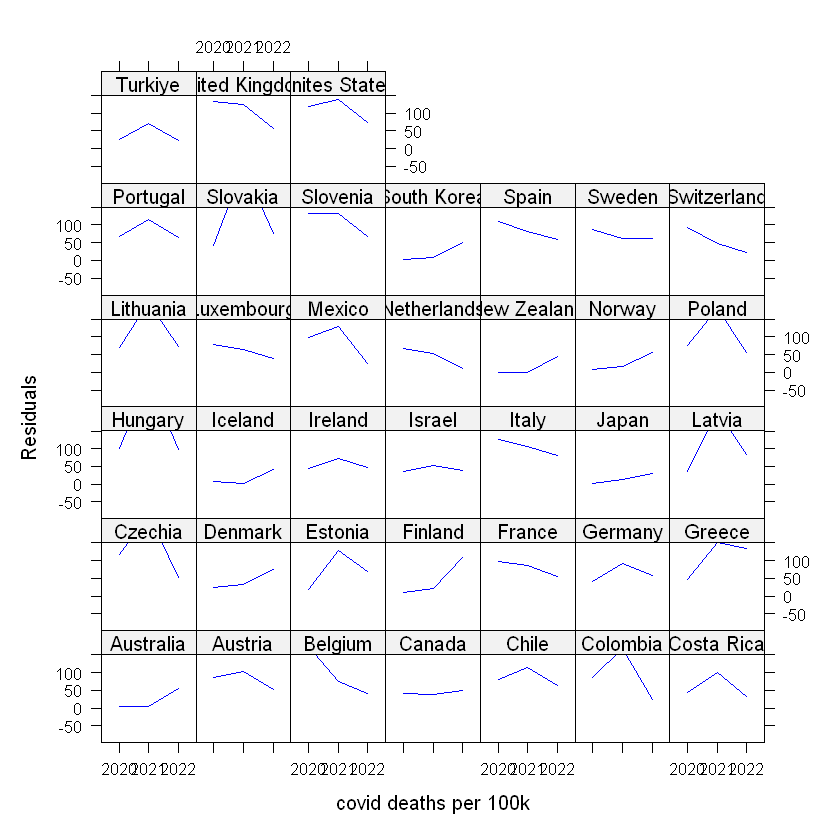

In [32]:
plot(x = pdata$covid_deaths_per_100k,y = res, xlab = "covid deaths per 100k", ylab = "Residuals")


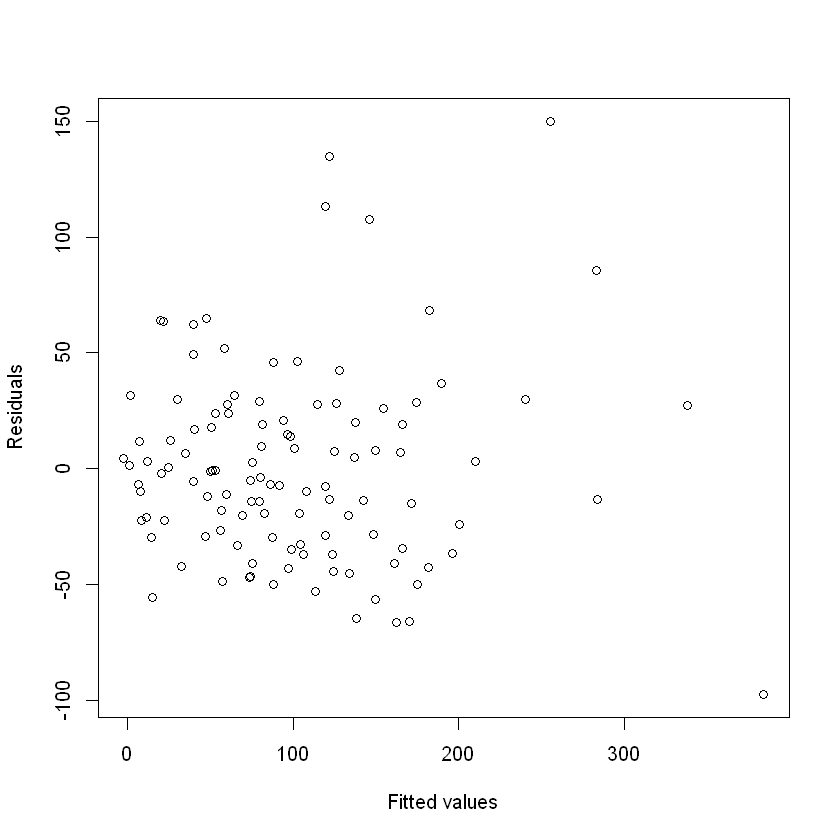

In [33]:
plot(yhat, res, xlab = "Fitted values",  ylab = "Residuals")

We can see the spread of the data points which ensures the heteroscedastic nature as clustered patterns are visible. It just translates to the variability of the dependent variable which is the covid deaths per 100k for our dataset. Therefore, we can conclude that OLS is not really the best model to analyze our dataset.

# The Fixed Effect Model

The Fixed Effect model assumes variations within a cross-section which could be due to the inherent characteristics of that entity, which is country for our case. Here, we control for the time invariant characteristics and study the net effect of the predictors in the outcome or excess deaths variable for our dataset. The difference between the fixed effects and the OLS model is changing this model parameter from pooling to within.

In [34]:
fe <- plm(excess_deaths_per_100k ~ covid_deaths_per_100k + 
    GDP_per_capita + Age_65_over_percentage + urban_pop_percentage + Pop_density+Access_to_quality_healthcare, 
    data = pdata, model = 'within')
           
summary(fe)

Oneway (individual) effect Within Model

Call:
plm(formula = excess_deaths_per_100k ~ covid_deaths_per_100k + 
    GDP_per_capita + Age_65_over_percentage + urban_pop_percentage + 
    Pop_density + Access_to_quality_healthcare, data = pdata, 
    model = "within")

Balanced Panel: n = 38, T = 3, N = 114

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-77.83823 -14.42815  -0.73299  14.82122  60.00774 

Coefficients:
                                Estimate  Std. Error t-value Pr(>|t|)    
covid_deaths_per_100k         1.18110987  0.07347415 16.0752  < 2e-16 ***
GDP_per_capita               -0.00037278  0.00090854 -0.4103  0.68282    
Age_65_over_percentage       42.28084531 24.37579006  1.7345  0.08716 .  
Pop_density                   4.11344336  2.21676030  1.8556  0.06766 .  
Access_to_quality_healthcare 13.21768685 14.17425890  0.9325  0.35423    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    329380
Residual Sum of Squar

the GDP_per_capita remains insignificant for this relation, as it was significant in the OLS model

## Test to see if Fixed Effect Model is better than OLS

In [35]:
pFtest(fe, Ols)


	F test for individual effects

data:  excess_deaths_per_100k ~ covid_deaths_per_100k + GDP_per_capita +  ...
F = 4.2047, df1 = 36, df2 = 71, p-value = 1.228e-07
alternative hypothesis: significant effects


We can see the p-value is much smaller than 5% level. Therefore, we can reject the null hypothesis and proceed with fixed effects model. Now, let’s look into the random effects model and check whether that fits our data better.

# Random Effects Model
The random effects model includes the possibility of between entity variations. It also assumes that this variation is random in nature or they are uncorrelated with variables under study.

In [37]:
re <- plm (excess_deaths_per_100k ~ covid_deaths_per_100k + 
    GDP_per_capita + Age_65_over_percentage + urban_pop_percentage + Pop_density+Access_to_quality_healthcare, 
    data = pdata, model = "random")
summary(re)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = excess_deaths_per_100k ~ covid_deaths_per_100k + 
    GDP_per_capita + Age_65_over_percentage + urban_pop_percentage + 
    Pop_density + Access_to_quality_healthcare, data = pdata, 
    model = "random")

Balanced Panel: n = 38, T = 3, N = 114

Effects:
                 var std.dev share
idiosyncratic 877.69   29.63 0.477
individual    962.16   31.02 0.523
theta: 0.5171

Residuals:
   Min. 1st Qu.  Median 3rd Qu.    Max. 
-73.807 -21.572  -3.006  16.595  83.826 

Coefficients:
                                Estimate  Std. Error z-value Pr(>|z|)    
(Intercept)                   2.3955e+02  9.7596e+01  2.4545  0.01411 *  
covid_deaths_per_100k         1.1557e+00  6.8208e-02 16.9439  < 2e-16 ***
GDP_per_capita               -1.8160e-04  2.4128e-04 -0.7526  0.45167    
Age_65_over_percentage       -2.2819e+00  1.8836e+00 -1.2115  0.22571    
urban_pop_percentage         -4.1406e-01  6.

We can see that the intercept is not significant. But since the overall model is significant, we can proceed to the diagnostic tests to determine if random effects model fares over the other models. We have already concluded that fixed effects model is better than the OLS model. So now we will compare between fixed effects and random effects model. We will use a very popular diagnostic test for this purpose called Hausman Test. The null hypothesis of this test states that random effects is preferred over fixed effects.



In [37]:
phtest(fe, re)


	Hausman Test

data:  excess_deaths_per_100k ~ covid_deaths_per_100k + GDP_per_capita +  ...
chisq = 29.174, df = 5, p-value = 2.144e-05
alternative hypothesis: one model is inconsistent


The p-value here is less than 0.05 Therefore, we can reject the null hypothesis and conclude that the fixed effects model is more suited to our data .

# Analyzing the best model
Now we know that fixed effect model is the best for the data, lets analyze the relationship between independent and dependent variables from that model.



In [38]:
summary(fe)

Oneway (individual) effect Within Model

Call:
plm(formula = excess_deaths_per_100k ~ covid_deaths_per_100k + 
    GDP_per_capita + Age_65_over_percentage + urban_pop_percentage + 
    Pop_density + Access_to_quality_healthcare, data = pdata, 
    model = "within")

Balanced Panel: n = 38, T = 3, N = 114

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-77.83823 -14.42815  -0.73299  14.82122  60.00774 

Coefficients:
                                Estimate  Std. Error t-value Pr(>|t|)    
covid_deaths_per_100k         1.18110987  0.07347415 16.0752  < 2e-16 ***
GDP_per_capita               -0.00037278  0.00090854 -0.4103  0.68282    
Age_65_over_percentage       42.28084531 24.37579006  1.7345  0.08716 .  
Pop_density                   4.11344336  2.21676030  1.8556  0.06766 .  
Access_to_quality_healthcare 13.21768685 14.17425890  0.9325  0.35423    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    329380
Residual Sum of Squar

Variables:

Dependent variable: Excess deaths per 100k

Independent variables:

COVID deaths per 100k

GDP per capita

Percentage of the population aged 65 or older

Percentage of the population living in urban areas

Population density

Key Findings:

COVID deaths per 100k: Highly significant positive association with excess deaths (coefficient = 1.186034, p < 2e-16). A unit increase in COVID deaths per 100k is associated with an estimated 1.19 increase in excess deaths per 100k, within each country.
Other variables: Not significant within the model, suggesting their effects on excess deaths might be explained by time-invariant country-specific factors.
Model Fit:

R-squared (0.80846): Explains 80.85% of the variability in excess deaths within countries.
Adjusted R-squared (0.69901): Accounts for the number of predictors, indicating a good fit.
F-statistic (73.8651, p < 2.22e-16): Highly significant, suggesting the model overall has predictive power.
Interpretation:

After accounting for unobserved country-specific factors, COVID deaths per 100k remains a strong predictor of excess deaths within countries.
Other variables in the model don't show significant within-country effects, but their overall effects might be captured by the country fixed effects.

# Check to see if Panel Effects exist in data

In [39]:
plmtest(pooled, type=c("bp"))


	Lagrange Multiplier Test - (Breusch-Pagan)

data:  excess_deaths_per_100k ~ covid_deaths_per_100k + GDP_per_capita +  ...
chisq = 21.714, df = 1, p-value = 3.165e-06
alternative hypothesis: significant effects


# Lasso method try

LASSO is a type of linear regression that includes regularization—the process of adding information to prevent overfitting, typically by adding a penalty to the loss function.

In [41]:
library("tidyverse")

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between() masks plm::between()
✖ tidyr::expand()  masks Matrix::expand()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks plm::lag(), stats::lag()
✖ dplyr::lead()    masks plm::lead()
✖ tidyr::pack()    masks Matrix::pack()
✖ dplyr::recode()  masks car::recode()
✖ purrr::some()    masks car::some()
✖ tidyr::unpack()  masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [40]:

data1 <- df %>%
  select(country,countrycode, year, excess_deaths_per_100k, covid_deaths_per_100k,  GDP_per_capita, Age_65_over_percentage, urban_pop_percentage, Pop_density, Access_to_quality_healthcare)

head(data1)


,country,countrycode,year,excess_deaths_per_100k,covid_deaths_per_100k,GDP_per_capita,Age_65_over_percentage,urban_pop_percentage,Pop_density,Access_to_quality_healthcare
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,Australia,AUS,2020,-13.49899,3.547027,51868.25,16.2,86,3,72.6
2,Australia,AUS,2021,18.93437,5.290392,60697.25,16.6,86,3,72.5
3,Australia,AUS,2022,84.34512,55.575796,65099.85,16.6,86,3,72.5
4,Austria,AUT,2020,90.40592,86.420701,48789.50,19.1,59,108,66.6
5,Austria,AUT,2021,88.79044,102.250791,53517.89,19.4,59,109,66.8
6,Austria,AUT,2022,108.51695,51.795809,52084.68,19.4,59,110,66.8


# For 2020

In [41]:
data_2020 = data1 %>%
   filter(year==2020)
head(data_2020)

,country,countrycode,year,excess_deaths_per_100k,covid_deaths_per_100k,GDP_per_capita,Age_65_over_percentage,urban_pop_percentage,Pop_density,Access_to_quality_healthcare
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,Australia,AUS,2020,-13.49899,3.547027,51868.248,16.2,86,3,72.6
2,Austria,AUT,2020,90.40592,86.420701,48789.498,19.1,59,108,66.6
3,Belgium,BEL,2020,159.48534,172.226530,45609.003,19.2,99,380,68.3
4,Canada,CAN,2020,38.75704,42.078907,43349.678,18.0,81,4,70.0
5,Chile,CHL,2020,73.40521,80.736714,13173.785,12.4,85,26,61.6
6,Colombia,COL,2020,108.66106,87.218909,5304.289,8.1,81,45,78.6


In [42]:
# Ensure that the column names are written exactly as they are in your data frame
X <- as.matrix(data_2020[, c("covid_deaths_per_100k", "GDP_per_capita", "Age_65_over_percentage", "urban_pop_percentage", "Pop_density", "Access_to_quality_healthcare")])

# Response variable
y <- data_2020$excess_deaths_per_100k


Loaded glmnet 4.1-8




Call:  cv.glmnet(x = X, y = y, alpha = 1) 

Measure: Mean-Squared Error 

    Lambda Index Measure     SE Nonzero
min  2.422    35    1862  884.7       5
1se 22.583    11    2732 1150.2       2
7 x 1 sparse Matrix of class "dgCMatrix"
                                        s1
(Intercept)                   1.992540e+02
covid_deaths_per_100k         1.177815e+00
GDP_per_capita               -5.367705e-04
Age_65_over_percentage       -1.586274e+00
urban_pop_percentage         -6.605078e-01
Pop_density                   .           
Access_to_quality_healthcare -1.351893e+00


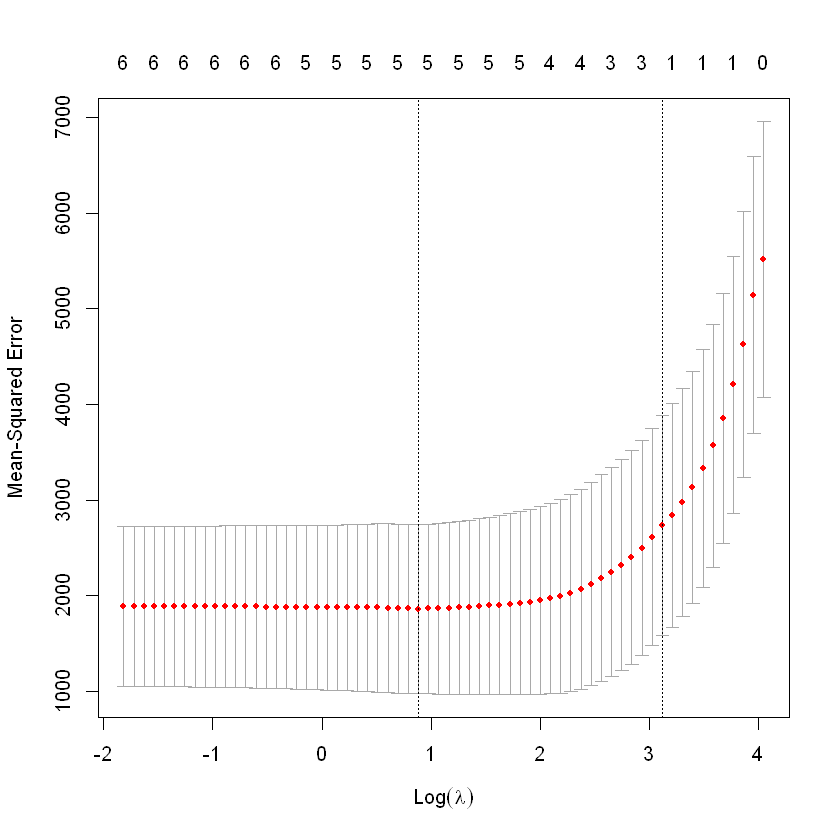

In [43]:
library(glmnet)

lasso_model_2020 <- cv.glmnet(X, y, alpha = 1)  # alpha = 1 corresponds to Lasso

# Display the cross-validated Lasso model
print(lasso_model_2020)
# Plot the cross-validated mean squared error (cvm) as a function of log(lambda)
plot(lasso_model_2020)

# Choose the best lambda value
best_lambda <- lasso_model_2020$lambda.min

# Extract coefficients for the best lambda
lasso_coefficients <- coef(lasso_model_2020, s = best_lambda)

# Display the coefficients
print(lasso_coefficients)


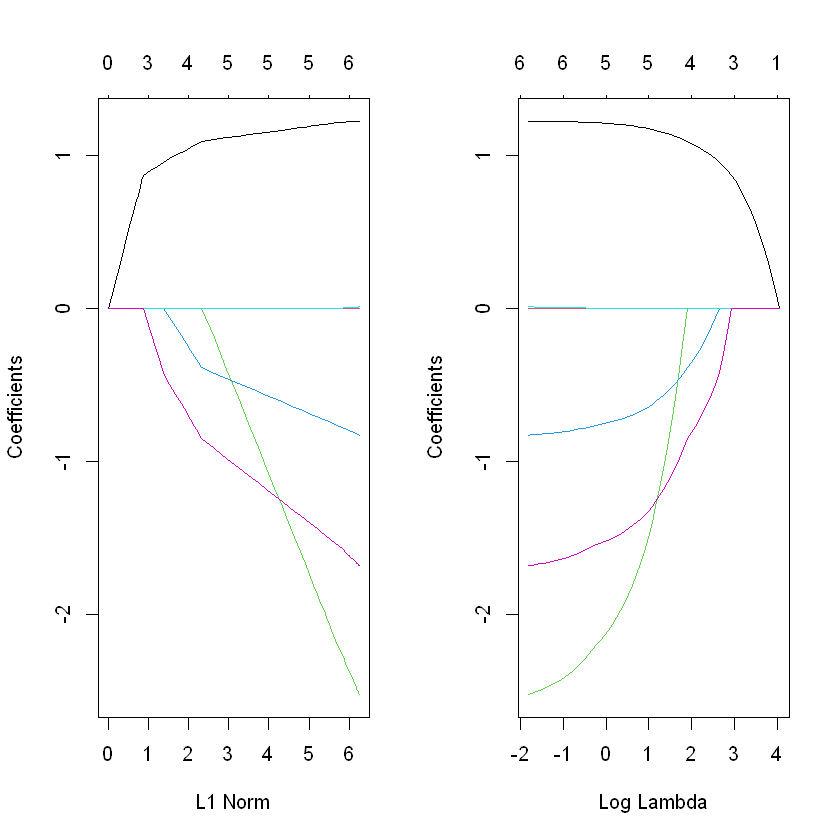

In [44]:
op <- par(mfrow=c(1, 2))
plot(lasso_model_2020$glmnet.fit, "norm",   label=TRUE)
plot(lasso_model_2020$glmnet.fit, "lambda", label=TRUE)
par(op)

The cv.glmnet function performs LASSO regression across a range of lambda values (which control the strength of the penalty applied to the model). It uses cross-validation to determine how well each model performs. The performance measure used here is the Mean-Squared Error (MSE), which assesses the average squared difference between the observed actual outcomes and the outcomes predicted by the model.

The output indicates two lambda values of interest:

min: The lambda value that gives the minimum mean squared error. Here, it's 2.422, associated with an MSE of 1862 and a standard error of 884.7. The model with this lambda value includes 5 predictors.

1se: The lambda value one standard error away from the minimum MSE. It's often used as a more conservative choice, trading off some increase in error for a simpler model with fewer predictors. Here, it's 22.583, associated with an MSE of 2732, a standard error of 1150.2, and 3 predictors included in the model.

The sparse matrix shows the coefficients of the model at the lambda value that minimizes MSE:

(Intercept): The model's intercept.
covid_deaths_per_100k: For each additional COVID-19 death per 100k, excess deaths per 100k increase by 1.17, holding all other variables constant.
GDP_per_capita: Each unit increase in GDP per capita is associated with a decrease in excess deaths per 100k of 0.0005367, although this relationship is likely very small given the coefficient size.
Age_65_over_percentage: Each percentage point increase in the population over 65 is associated with a decrease in excess deaths per 100k of 1.5862.
urban_pop_percentage: Each percentage point increase in the urban population is associated with a decrease in excess deaths per 100k of 0.66050.
Pop_density: This variable was not selected by the model at the optimal lambda, which is indicated by a dot (meaning its coefficient was shrunk to zero).
Access_to_quality_healthcare: Each unit increase in the access to quality healthcare score is associated with a decrease in excess deaths per 100k of 1.3518.

# # For 2021 

In [45]:
data_2021 = df %>%
   filter(year==2021)
head(data_2021)

,country,countrycode,year,total_deaths,covid_deaths,expected_deaths,excess_deaths,population,land_area,Ratio.of.Excess.death.to.COVID.19.deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,GDP_per_capita,Age_65_over_percentage,urban_pop_percentage,Pop_density,Access_to_quality_healthcare,year2021,year2022
,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Australia,AUS,2021,171718,1359,166854.12,4863.877,25688079,7682300,3.6,170359,5.290392,18.93437,60697.245,16.6,86,3,72.5,1,0
2,Austria,AUT,2021,89538,9153,81589.91,7948.094,8951520,82409,0.9,80385,102.250791,88.79044,53517.890,19.4,59,109,66.8,1,0
3,Belgium,BEL,2021,111956,8630,107520.51,4435.492,11552615,30280,0.5,103326,74.701702,38.39384,51850.397,19.4,99,382,68.0,1,0
4,Canada,CAN,2021,311005,14379,297117.82,13887.180,38226498,"9,093,510",1.0,296626,37.615269,36.32867,52358.622,18.5,81,4,70.0,1,0
5,Chile,CHL,2021,137087,22608,112491.26,24595.736,19678363,"743,532",1.1,114479,114.887605,124.98873,16240.608,12.7,85,26,61.0,1,0
6,Colombia,COL,2021,361403,86061,252568.00,108834.999,51117378,"1,109,500",1.3,275342,168.359574,212.91193,6182.707,8.2,81,46,78.5,1,0



Call:  cv.glmnet(x = X, y = y, alpha = 1) 

Measure: Mean-Squared Error 

    Lambda Index Measure     SE Nonzero
min  3.138    38    2798  741.4       6
1se 26.666    15    3519 1157.4       1
7 x 1 sparse Matrix of class "dgCMatrix"
                                        s1
(Intercept)                   3.236075e+02
covid_deaths_per_100k         1.017162e+00
GDP_per_capita               -4.245771e-04
Age_65_over_percentage       -3.099793e+00
urban_pop_percentage         -2.912802e-01
Pop_density                  -7.242283e-03
Access_to_quality_healthcare -3.013143e+00


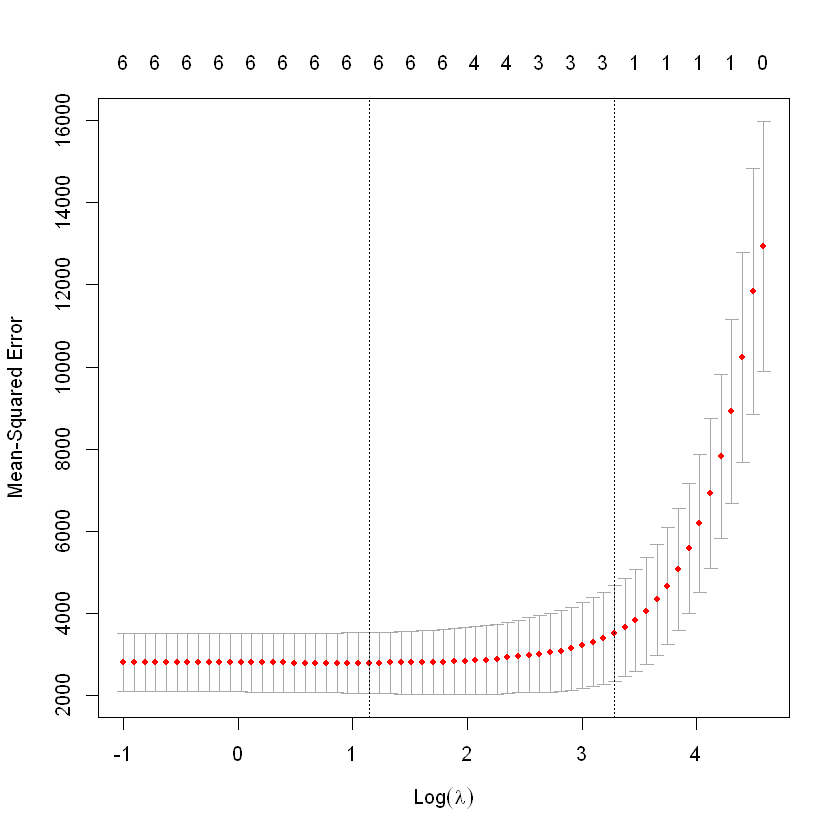

In [46]:

# Ensure that the column names are written exactly as they are in your data frame
X <- as.matrix(data_2021[, c("covid_deaths_per_100k", "GDP_per_capita", "Age_65_over_percentage", "urban_pop_percentage", "Pop_density", "Access_to_quality_healthcare")])

# Response variable
y <- data_2021$excess_deaths_per_100k







# Fit Lasso regression model
lasso_model_2021 <- cv.glmnet(X, y, alpha = 1)  # alpha = 1 corresponds to Lasso

# Display the cross-validated Lasso model
print(lasso_model_2021)
# Plot the cross-validated mean squared error (cvm) as a function of log(lambda)
plot(lasso_model_2021)

# Choose the best lambda value
best_lambda <- lasso_model_2021$lambda.min

# Extract coefficients for the best lambda
lasso_coefficients_2021 <- coef(lasso_model_2021, s = best_lambda)

# Display the coefficients
print(lasso_coefficients_2021)

min: The lambda value that gives the minimum mean squared error in the cross-validation. It is reported to be 3.138, corresponding to an MSE of 2798 with a standard error of 741.4, and the model at this lambda has 6 non-zero coefficients.

1se: The lambda value that gives the simplest model within one standard error of the minimum MSE. It is more conservative and results in fewer variables being included in the model (1 non-zero coefficient in this case). It is reported to be 26.666, corresponding to an MSE of 3519 with a standard error of 1157.4.

The coefficients provided are for the model with the lambda that minimizes the MSE (min lambda). The interpretation of the coefficients is as follows:

(Intercept): The baseline level of excess deaths per 100k when all other predictors are zero is approximately 323.6.

covid_deaths_per_100k: For each additional COVID-19 death per 100k, there is an increase of 1.017 excess deaths per 100k, holding other variables constant.
GDP_per_capita: Each unit increase in GDP per capita is associated with a decrease in excess deaths per 100k of 0.000425.

Age_65_over_percentage: Each percentage point increase in the population over 65 is associated with a decrease in excess deaths per 100k of 3.0997.

urban_pop_percentage: Each percentage point increase in the urban population is associated with a decrease in excess deaths per 100k of 0.291.

Pop_density: Each unit increase in population density is associated with a decrease in excess deaths per 100k of 0.0072.

Access_to_quality_healthcare: Each unit increase in the access to quality healthcare score is associated with a decrease in excess deaths per 100k of 3.013.

# For 2022

In [47]:
data_2022 = df %>%
   filter(year==2022)
head(data_2022)

,country,countrycode,year,total_deaths,covid_deaths,expected_deaths,excess_deaths,population,land_area,Ratio.of.Excess.death.to.COVID.19.deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,GDP_per_capita,Age_65_over_percentage,urban_pop_percentage,Pop_density,Access_to_quality_healthcare,year2021,year2022
,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Australia,AUS,2022,190326,14438,168414.04,21911.965,25978935,7682300,1.5,175888,55.57580,84.34512,65099.846,16.6,86,3,72.5,0,1
2,Austria,AUT,2022,91582,4689,81758.12,9823.883,9052856,82409,2.1,86893,51.79581,108.51695,52084.681,19.4,59,110,66.8,0,1
3,Belgium,BEL,2022,116138,4897,107158.52,8979.476,11640788,30280,1.8,111241,42.06760,77.13805,49926.825,19.4,99,384,68.0,0,1
4,Canada,CAN,2022,336845,19228,302632.96,34212.039,38929902,"9,093,510",1.8,317617,49.39134,87.88113,54917.663,18.5,81,4,70.0,0,1
5,Chile,CHL,2022,136472,12591,114278.36,22193.641,19828563,"743,532",1.8,123881,63.49931,111.92763,15355.480,12.7,85,27,61.0,0,1
6,Colombia,COL,2022,285026,11855,258781.27,26244.729,51682692,"1,109,500",2.2,273171,22.93805,50.78050,6624.165,8.2,81,47,78.5,0,1



Call:  cv.glmnet(x = X, y = y, alpha = 1) 

Measure: Mean-Squared Error 

    Lambda Index Measure    SE Nonzero
min  5.088    18    1413 530.8       2
1se 20.540     3    1910 622.6       2
7 x 1 sparse Matrix of class "dgCMatrix"
                                      s1
(Intercept)                  185.9017248
covid_deaths_per_100k          0.5501154
GDP_per_capita                 .        
Age_65_over_percentage         .        
urban_pop_percentage           .        
Pop_density                    .        
Access_to_quality_healthcare  -1.8099398


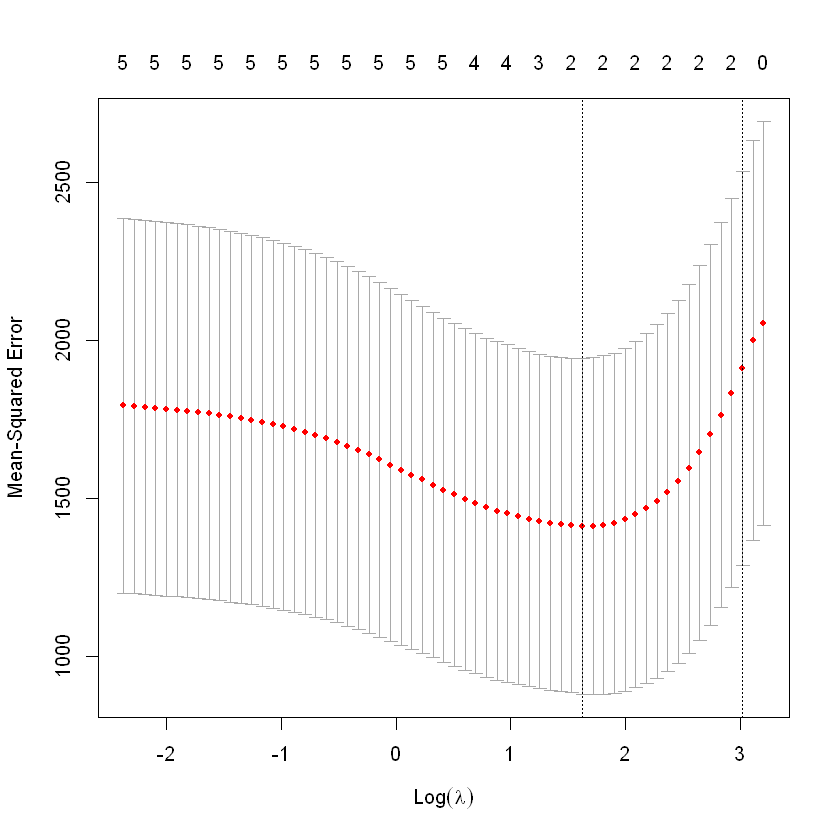

In [48]:

X <- as.matrix(data_2022[, c("covid_deaths_per_100k", "GDP_per_capita", "Age_65_over_percentage", "urban_pop_percentage", "Pop_density", "Access_to_quality_healthcare")])

# Response variable
y <- data_2022$excess_deaths_per_100k







# Fit Lasso regression model
lasso_model_2022 <- cv.glmnet(X, y, alpha = 1)  # alpha = 1 corresponds to Lasso

# Display the cross-validated Lasso model
print(lasso_model_2022)
# Plot the cross-validated mean squared error (cvm) as a function of log(lambda)
plot(lasso_model_2022)

# Choose the best lambda value
best_lambda <- lasso_model_2022$lambda.min

# Extract coefficients for the best lambda
lasso_coefficients_2022 <- coef(lasso_model_2022, s = best_lambda)

# Display the coefficients
print(lasso_coefficients_2022)

min: This is the lambda value that minimizes the cross-validated MSE. It's 5.088, corresponding to an MSE of 1413 with a standard error of 530.8. The model with this lambda selects 2 predictors.

1se: This is the lambda value that is one standard error larger than the minimum MSE. It's more conservative, resulting in a simpler model. It's 20.540, with an MSE of 1910 and a standard error of 622.6. Interestingly, this model does not select any predictors, which suggests that none of the predictors are strong enough to be included in the model at this level of regularization.

The sparse matrix provides the coefficients at the 'min' lambda:

(Intercept): The baseline level of excess deaths per 100k when all other predictors are zero is 185.9.

covid_deaths_per_100k: Each additional COVID-19 death per 100k is associated with an increase of 0.5501 in excess deaths per 100k, showing it is a significant predictor even after the LASSO shrinkage.
Other variables like GDP per capita, Age 65 over percentage, urban population percentage, and population density have been shrunk to zero, meaning they were not selected by the model as significant predictors at this level of regularization.
Access_to_quality_healthcare: Having a negative coefficient of -1.8099, suggesting that better access to quality healthcare is associated with a reduction in excess deaths per 100k.

Overall, the LASSO model suggests that after accounting for regularization and predictor selection, COVID-19 deaths and access to quality healthcare are the most relevant predictors for excess deaths per 100k in this dataset, with other factors being less influential at the chosen regularization strength.